In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd

In [20]:
def plot(kmerDF, minSpecificity = 0, minCleavage = 0):
    # Create a new column "color" based on condition
    conditions = [
        (kmerDF['rs3_score_norm'] >= minCleavage) & (kmerDF['specificity'] >= minSpecificity),
        (kmerDF['rs3_score_norm'] < minCleavage) | (kmerDF['specificity'] < minSpecificity),
    ]

    choices = ['green', 'black']

    kmerDF['color'] = np.select(conditions, choices, default='black')

    # Plot with colors
    ax = kmerDF.plot.scatter(x='rs3_score_norm', y='specificity', c=kmerDF['color'], label='Below Cutoff')

    # Adding scatter plot for above cutoff points with different color and label
    aboveCutoff = kmerDF[kmerDF['color'] == 'green']
    ax.scatter(aboveCutoff['rs3_score_norm'], aboveCutoff['specificity'], color='green')

    # Add horizontal line at y-position minSpecificity
    ax.axhline(minSpecificity, color='red')

    # Add vertical line at x-position minCleavage
    ax.axvline(minCleavage, color='red')

    # Set x and y axes limits
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    # Create custom legend
    belowCutoffPatch = mpatches.Patch(color='black', label='Guides below cutoffs')
    aboveCutoffPatch = mpatches.Patch(color='green', label='Guides above cutoffs')
    plt.legend(handles=[belowCutoffPatch, aboveCutoffPatch])

    # Show the number of guides beyond cutoff
    numGuidesBeyondCutoff = len(aboveCutoff)
    print(f"Number of guides beyond cutoff: {numGuidesBeyondCutoff}")

    plt.show()


Number of guides beyond cutoff: 89


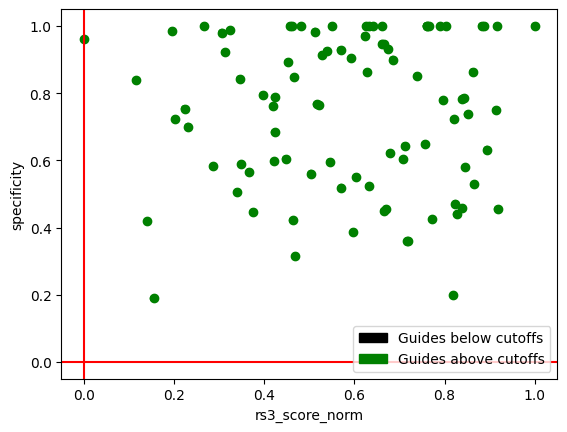

In [21]:
df = pd.read_csv("./final/AllScoredGuides.tsv", delimiter='\t', \
                         header=0)
plot(df)

In [9]:
df

,chr,start,stop,"id,sequence,pam,chromosome,position,sense",context,strand,tscripts,id,rs3_z_score,rs3_percentile,rs3_score_norm,specificity,combined_score
0,chr21,21338521,21338522,"chr21:21338505:+,GATGGCTTCACGTTCACTGA,NGG,chr2...",CTGTGGATGGCTTCACGTTCACTGAAGGCG,+,"ENST00000400546.6,ENST00000284894.8",chr21:21338505:+,1.142982,0.873477,1.000000,1.000000,1.000000
1,chr21,21373867,21373868,"chr21:21373851:+,CGATGTAAACAGAGCCTGGA,NGG,chr2...",TGAATCGATGTAAACAGAGCCTGGACGGCC,+,"ENST00000400546.6,ENST00000284894.8",chr21:21373851:+,0.849544,0.802211,0.916182,1.000000,0.943842
2,chr21,20998593,20998594,"chr21:20998587:-,TACTGACAAGCAACCCCAGC,NGG,chr2...",CCCGCTACTGACAAGCAACCCCAGCAGGTA,-,ENST00000400546.6,chr21:20998587:-,0.752817,0.774220,0.888553,1.000000,0.925331
3,chr21,21338462,21338463,"chr21:21338446:+,CACTCGTATGTGATGCGGAA,NGG,chr2...",AGTCACACTCGTATGTGATGCGGAAGGGGA,+,"ENST00000400546.6,ENST00000284894.8",chr21:21338446:+,0.731061,0.767629,0.882338,1.000000,0.921167
4,chr21,21373885,21373886,"chr21:21373869:+,GACGGCCGTATCGAAGTCAA,NGG,chr2...",GCCTGGACGGCCGTATCGAAGTCAAAGGGC,+,"ENST00000400546.6,ENST00000284894.8",chr21:21373869:+,0.456342,0.675928,0.803868,1.000000,0.868591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,chr21,21324457,21324458,"chr21:21324441:+,AGAAATGACATTTTCCTGCA,NGG,chr2...",GGAGAAGAAATGACATTTTCCTGCAGGGCC,+,"ENST00000400546.6,ENST00000284894.8",chr21:21324441:+,-1.648592,0.049616,0.202612,0.723053,0.374358
85,chr21,21410312,21410313,"chr21:21410296:+,CCAAACAATTTATTACTCTT,NGG,chr2...",TCAAACCAAACAATTTATTACTCTTGGGAA,+,"ENST00000400546.6,ENST00000284894.8",chr21:21410296:+,-1.951867,0.025477,0.115984,0.837609,0.354120
86,chr21,21338484,21338485,"chr21:21338478:-,GCTCTTTTCCAAGTGATTTC,NGG,chr2...",CCACAGCTCTTTTCCAAGTGATTTCTGGAA,-,"ENST00000400546.6,ENST00000284894.8",chr21:21338478:-,-2.357916,0.009189,0.000000,0.959700,0.316701
87,chr21,21338400,21338401,"chr21:21338394:-,TTTTTAAGCTGTATTATGTG,NGG,chr2...",TTTCATTTTTAAGCTGTATTATGTGAGGCT,-,"ENST00000400546.6,ENST00000284894.8",chr21:21338394:-,-1.864194,0.031147,0.141027,0.418275,0.232519
